# Label and color

colors = { "M0":"#c0c0c0", "M1":"#ff7f00", "M1a":"#fdbf6f", 
         "M2a":"#33a02c", "M2b":"#ffff99", "M2c+":"#b2df8a", 
         "M2c":"#e53d3f", "M2d":"#1f78b4", "IL10+":"#a6cee3",
         "TGFB+":"#fb9a99", 
        }
for k, v in colors.items():
    print( k, tuple(c for c in bytes.fromhex(v[1:])) )

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
from random import sample
from matplotlib import cm
import matplotlib
from math import sqrt,ceil
matplotlib.rcParams['svg.fonttype'] = 'none'
from collections import OrderedDict
from itertools import product

#%matplotlib inline

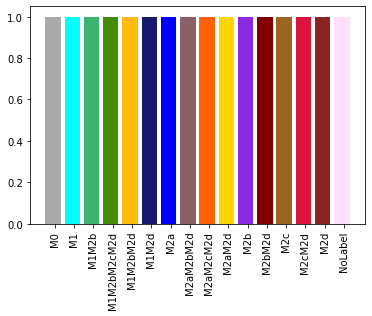

In [2]:
colors = {
"M0"	:	(170./255,170./255,170./255),
"M1"	:	(0/255,255./255,255./255),
"M2a"	:	(0/255,0/255,255./255),
"M2b"	:	(138./255,43./255,226./255),
"M2c"	:	(156./255,102./255,31./255),
"M2d"	:	(139./255,35./255,35./255),
"M2aM2cM2d"	:	(255./255,97./255,3./255),
"M1M2bM2cM2d"	:	(69./255,139./255,0./255),
"M2cM2d"	:	(220./255,20./255,60./255),
"M1M2bM2d"	:	(255./255,185./255,15./255),
"M2aM2d"	:	(255./255,215./255,0./255),
"M2aM2bM2d"	:	(139./255,95./255,101./255),
"M2bM2d"	:	(128./255,0./255,0./255),
"M1M2b"	:	(60./255,179./255,113./255),
"M1M2d"	:	(25./255,25./255,112./255),
"NoLabel"	:	(255./255,225./255,255./255)

            }

colors = OrderedDict(sorted(colors.items(), key=lambda t: t[0]))


plt.bar(range(len(colors)), [1]*len(colors), color=colors.values(), align="edge" )
plt.xticks(np.arange(0.5,len(colors)+.5,1), list(colors.keys()), rotation='vertical')
#plt.savefig('ColorCode.svg')
plt.show()

In [3]:
def labelState(x):
    #x = [STAT3,SMAD23,STAT6,SOCS1,TLR4,NFKB,STAT1,SOCS3,AP1,IL10,TNFA,TGFB,Fra1,HIF1A,ERK,IL4e,IL10e,TNFAe,TGFBe,IgG,A2a,IFNG,IFNB,IL1B,IL6e,MCSF,GMCSF,Hipoxia,GCGCR]
    label = ''
    feno = ''
    fl = 0
    if (x[0]<=0.25) and (x[2]<=0.25) and (x[5]<=0.25) and (x[6]<=0.25) and (x[8]<=0.25) and (x[12]<=0.25) and (x[13]<=0.25) and (x[14]<=0.25): 
        label = ("M0")
        fl += 1
        feno += label
        feno += '-'
########### 
    if (x[2]>=.75) and (((x[23]>=.75) and (x[8]>=0.75)) or (x[14]>=0.75)) and (((x[4]>=0.75) and (x[20]>=0.75)) or ((x[12]>=0.75) and (x[8]>=0.75)) or (x[13]>=0.75) or (x[12]>=0.75)):
            label = ("M2aM2bM2d")
            fl += 1
            feno += label
            feno += '-'
    else:
        if (x[2]>=.75) and (x[0]>=.75) and (((x[4]>=0.75) and (x[20]>=0.75)) or ((x[12]>=0.75) and (x[8]>=0.75)) or (x[13]>=0.75) or (x[12]>=0.75)):
            label = ("M2aM2cM2d")
            fl += 1
            feno += label
            feno += '-'
        elif (x[0]>=.75) and (((x[4]>=0.75) and (x[20]>=0.75)) or ((x[12]>=0.75) and (x[8]>=0.75)) or (x[13]>=0.75) or (x[12]>=0.75)):
            label = ("M2cM2d")
            fl += 1
            feno += label
            feno += '-'
        elif (x[2]>=.75) and (((x[4]>=0.75) and (x[20]>=0.75)) or ((x[12]>=0.75) and (x[8]>=0.75)) or (x[13]>=0.75) or (x[12]>=0.75)):
            label = ("M2aM2d")
            fl += 1
            feno += label
            feno += '-'
        elif (x[2]>=.75):
            label = ("M2a")
            fl += 1
            feno += label
            feno += '-'
        elif (x[0]>=.75):
            label = ("M2c")
            fl += 1
            feno += label
            feno += '-'
        elif ((x[4]>=0.75) and (x[20]>=0.75)) or ((x[12]>=0.75) and (x[8]>=0.75)) or (x[13]>=0.75) or (x[12]>=0.75):
            label = ("M2d")
            fl += 1
            feno += label
            feno += '-'
        else:
            if ((x[5]>=0.75) or (x[6]>=0.75) or ((x[10]>=0.75) and (x[8]>=0.75)) or ((x[17]>=0.75) and (x[8]>=0.75))) and (((x[23]>=.75) and (x[8]>=0.75)) or (x[14]>=0.75)) and (x[0]>=.75) and (((x[4]>=0.75) and (x[20]>=0.75)) or ((x[12]>=0.75) and (x[8]>=0.75)) or (x[13]>=0.75) or (x[12]>=0.75)):
                label = ("M1M2bM2cM2d")
                fl += 1
                feno += label
                feno += '-'
            elif ((x[5]>=0.75) or (x[6]>=0.75) or ((x[10]>=0.75) and (x[8]>=0.75)) or ((x[17]>=0.75) and (x[8]>=0.75))) and (((x[23]>=.75) and (x[8]>=0.75)) or (x[14]>=0.75)) and (((x[4]>=0.75) and (x[20]>=0.75)) or ((x[12]>=0.75) and (x[8]>=0.75)) or (x[13]>=0.75) or (x[12]>=0.75)):
                label = ("M1M2bM2d")
                fl += 1
                feno += label
                feno += '-'
            elif ((x[5]>=0.75) or (x[6]>=0.75) or ((x[10]>=0.75) and (x[8]>=0.75)) or ((x[17]>=0.75) and (x[8]>=0.75))) and (((x[23]>=.75) and (x[8]>=0.75)) or (x[14]>=0.75)):
                label = ("M1M2b")
                fl += 1
                feno += label
                feno += '-'
            elif ((x[5]>=0.75) or (x[6]>=0.75) or ((x[10]>=0.75) and (x[8]>=0.75)) or ((x[17]>=0.75) and (x[8]>=0.75))) and (((x[4]>=0.75) and (x[20]>=0.75)) or ((x[12]>=0.75) and (x[8]>=0.75)) or (x[13]>=0.75) or (x[12]>=0.75)):
                label = ("M1M2d")
                fl += 1
                feno += label
                feno += '-'
            elif (((x[23]>=.75) and (x[8]>=0.75)) or (x[14]>=0.75)) and (((x[4]>=0.75) and (x[20]>=0.75)) or ((x[12]>=0.75) and (x[8]>=0.75)) or (x[13]>=0.75) or (x[12]>=0.75)):
                label = ("M2bM2d")
                fl += 1
                feno += label
                feno += '-'
            elif ((x[23]>=.75) and (x[8]>=0.75)) or (x[14]>=0.75): 
                label = ("M2b")
                fl += 1
                feno += label
                feno += '-'
            elif (x[5]>=0.75) or (x[6]>=0.75) or ((x[10]>=0.5) and (x[8]>=0.75)) or ((x[17]>=0.75) and (x[8]>=0.75)): 
                label = ("M1")
                fl += 1
                feno += label
                feno += '-'
############
    if (label == ""): label = "NoLabel"
 #   print(feno,fl)
    return label

In [4]:
def add_missing_columns_linspace(data, missing):
    from itertools import product
    from numpy import linspace
    
    jump = ceil(data.shape[0] ** (1.0 / len(missing) ))
    table = list(linspace(  start=0, stop=1, num=jump  ))
    table = [ list(reversed(p)) for p in product(table, repeat=len(missing)) ]
    table = table[(len(table)-data.shape[0]-1):-1]
    table = pd.DataFrame(table, columns=missing, index = list(data.index))

    return data.join(table)



In [5]:
def plot_points_3D(path, Ini_Sta,data, nodeA, nodeB, nodeC, filename=False):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    plt.title("Initial State: "+Ini_Sta)
    ax.set_xlabel(nodeA)
    ax.set_ylabel(nodeB)
    ax.set_zlabel(nodeC)

    handles = []
    for label in data["Label"].unique():
        data_filtered = data[data.Label != label]
        ax.scatter( data_filtered[nodeA], data_filtered[nodeB], data_filtered[nodeC], 
                    c=data_filtered["Color"].tolist(), label=label, lw = 0 )
        handles.append( mpatches.Patch(color=colors[label], label=label) )
    ax.view_init(azim=-135)
    plt.legend(handles=handles, bbox_to_anchor=(1.04,1), loc="upper left")
    if filename: plt.savefig(path+"/svg-color/"+filename+'-points.svg')
    else: plt.show()

In [6]:
def plot_points_2D(path, Ini_Sta,data, nodeA, nodeB, nodeC="TCR", valueC=1, filename=False):
    fig = plt.figure()
    plt.title("Initial State: "+Ini_Sta)
    plt.xlabel(nodeA)
    plt.ylabel(nodeB)

    handles = []
    for label in data["Label"].unique():
#        data_filtered = data[data[nodeC] == valueC ]
        data_filtered = data
        plt.scatter(data_filtered[nodeA], data_filtered[nodeB],
                    c=data_filtered["Color"].tolist(), label=label )
        handles.append( mpatches.Patch(color=colors[label], label=label) )
    plt.legend(handles=handles, bbox_to_anchor=(1.04,1), loc="upper left")
    if filename: plt.savefig(path+"/svg-color/"+filename+'-points.svg')
    else: plt.show()

In [7]:
def plot_mesh_3D(path, Ini_Sta,data, nodeA, nodeB, nodeC="TCR", filename=False):
    data_filtered = data[[nodeA, nodeB, nodeC, "Color"]]
 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    plt.title("Initial State: "+Ini_Sta)
    ax.set_xlabel(nodeA)
    ax.set_ylabel(nodeB)
    ax.set_zlabel(nodeC)
    
    X,Y = np.meshgrid(np.arange(0,1.1,.1), np.arange(0,1.1,.1))

    data_filtered = data[data[nodeA] == 0 ]
    c = data_filtered[[nodeB, nodeC, "Color"]].pivot(nodeB,nodeC).to_numpy()
    ax.plot_surface(0, Y, X, rstride=1, cstride=1, facecolors=c)
    labels = data_filtered["Label"].unique()
    handles = legend_custom(labels)
    plot_mesh2D_1(path=path, Ini_Sta=Ini_Sta,c=c, X=nodeB, Y=nodeC, cte=0, handles=handles, filename=file)

    data_filtered = data[data[nodeB] == 0 ]
    c = data_filtered[[nodeA, nodeC, "Color"]].pivot(nodeA,nodeC).to_numpy()
    ax.plot_surface(Y, 0, X, rstride=1, cstride=1, facecolors=c)
    labels = data_filtered["Label"].unique()
    handles = legend_custom(labels)
    plot_mesh2D_1(path=path, Ini_Sta=Ini_Sta,c=c, X=nodeA, Y=nodeC, cte=0, handles=handles, filename=file)

    data_filtered = data[data[nodeC] == 0 ]
#    print(data_filtered, X, Y) 
    #intentar substitutyendo el 0
    Z = np.zeros(X.shape)
    c = data_filtered[[nodeA, nodeB, "Color"]].pivot(nodeA,nodeB).to_numpy()
    ax.plot_surface(Y, X, Z, rstride=1, cstride=1, facecolors=c)
    labels = data_filtered["Label"].unique()
    handles = legend_custom(labels)
    plot_mesh2D_1(path=path, Ini_Sta=Ini_Sta,c=c, X=nodeA, Y=nodeB, cte=0, handles=handles, filename=file)
    
    data_filtered = data[data[nodeA] == 1 ]
    c = data_filtered[[nodeB, nodeC, "Color"]].pivot(nodeB,nodeC).to_numpy()
    ax.plot_surface(1, Y, X, rstride=1, cstride=1, facecolors=c)
    labels = data_filtered["Label"].unique()
    handles = legend_custom(labels)
    plot_mesh2D_1(path=path, Ini_Sta=Ini_Sta,c=c, X=nodeB, Y=nodeC, cte=1, handles=handles, filename=file)

    data_filtered = data[data[nodeB] == 1 ]
    c = data_filtered[[nodeA, nodeC, "Color"]].pivot(nodeA,nodeC).to_numpy()
    ax.plot_surface(Y, 1, X, rstride=1, cstride=1, facecolors=c)
    labels = data_filtered["Label"].unique()
    handles = legend_custom(labels)
    plot_mesh2D_1(path=path, Ini_Sta=Ini_Sta,c=c, X=nodeA, Y=nodeC, cte=1, handles=handles, filename=file)

    data_filtered = data[data[nodeC] == 1 ]
    Z = np.full((X.shape), 1, dtype = float)
    c = data_filtered[[nodeA, nodeB, "Color"]].pivot(nodeA,nodeB).to_numpy()
    ax.plot_surface(Y, X, Z, rstride=1, cstride=1, facecolors=c, linewidth=1, shade=False, edgecolors='k')
    labels = data_filtered["Label"].unique()
    handles = legend_custom(labels)
    plot_mesh2D_1(path=path, Ini_Sta=Ini_Sta,c=c, X=nodeA, Y=nodeB, cte=1, handles=handles, filename=file)

    from itertools import product, combinations
    #draw cube
    r = [-0.001, 0.901]
    for s, e in combinations(np.array(list(product(r,r,r))), 2):
        if np.sum(np.abs(s-e)) == r[1]-r[0]:
            ax.plot3D(*zip(s,e), color="k", lw=3)
    ax.view_init(azim=-135)

    if filename: plt.savefig(path+"/svg-color/"+filename+'-mesh.svg')
    else: plt.show()

In [8]:
def legend_custom(labels):
    handles = []
    for label in labels:
        handles.append( mpatches.Patch(color=colors[label], label=label))        
    return(handles)


In [9]:
def plot_mesh2D_1(path, Ini_Sta, c, X, Y, cte, handles, filename=False):
    from matplotlib.patches import Rectangle
    #data_filtered = data[data[nodeC] == valueC ]
    x = np.arange(0,1.1,.1)
#    y = np.arange(0,1.1,.1)
    XY= xy= product(x,repeat = 2)
    h = x[-1]-x[0]
  #  print(type(x),type(y),type(c))
 #   print(list(zip(XY, np.concatenate(c))))
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    plt.title("Initial State: "+Ini_Sta)
    plt.xlabel(X)
    plt.ylabel(Y)
    
    dif = (x[2]-x[1])/2
    plt.xlim([0-dif,1+dif])
    plt.ylim([0-dif,1+dif])

    for Z, cl in zip(XY, list(np.concatenate(c))):
#        print(Z,cl)
        ax.add_artist(Rectangle(xy=(Z[0]-dif, Z[1]-dif),
                  color=cl,
                  width=h, height=h))
    
    plt.legend(handles=handles, bbox_to_anchor=(1.04,1), loc="upper left")
    
    if filename: plt.savefig(path+"/svg-color/"+filename+'/'+X+"vs"+Y+"_"+str(cte)+'-mesh.svg')
    else: plt.show()

In [10]:
def plot_mesh_2D(path, Ini_Sta, data, nodeA, nodeB, nodeC="TCR",valueC=1, filename=False):
    from matplotlib.patches import Rectangle
#    data_filtered = data[data[nodeC] == valueC ]
    data_filtered = data
    x = data_filtered[nodeA]
    y = data_filtered[nodeB]
    c = data_filtered["Color"].tolist()
    labels = data_filtered["Label"].unique()
    handles = legend_custom(labels)
#    print(x)
    h = x.iloc[1]-x.iloc[0]
    
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    plt.title("Initial State: "+Ini_Sta)
    plt.xlabel(nodeA)
    plt.ylabel(nodeB)
    
    index = x.index
    dif = (x[index[2]]-x[index[1]])/2
    plt.xlim([0-dif,1+dif])
    plt.ylim([0-dif,1+dif])

    for x, y, c in zip(x, y, c):
        ax.add_artist(Rectangle(xy=(x-dif, y-dif),
                  color=c,
                  width=h, height=h))
    
    plt.legend(handles=handles, bbox_to_anchor=(1.04,1), loc="upper left")
    if filename: plt.savefig(path+"/svg-color/"+filename+'-mesh.svg')
    else: plt.show()

In [36]:
path = os.getcwd()
print(path)
#folder = "Results-M1"
folder = "Results-M2d"
path = path+"/"+folder
#path = os.getcwd()
os.listdir(path+"/csv-clean/")

C:\Users\Lenovo\Documents\Python


[' M2d_HIF1A_ERK.csv',
 ' M2d_HIF1A_STAT3.csv',
 ' M2d_HIF1A_STAT6.csv',
 'M2d_HIF1A_NFKB.csv',
 'M2d_HIF1A_STAT1.csv']

In [45]:
a = os.listdir(path+"/csv-clean/")[4]
for f in [a]: 
    print(f)

M2d_HIF1A_STAT1.csv


M2d HIF1A STAT1 TCR


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11840\485436708.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(["Sum","Label"], 1)


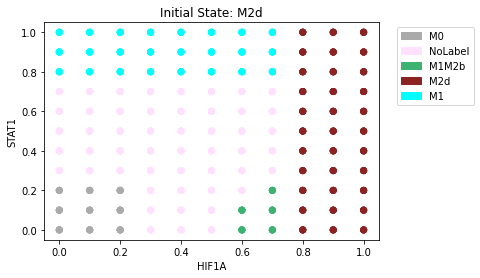

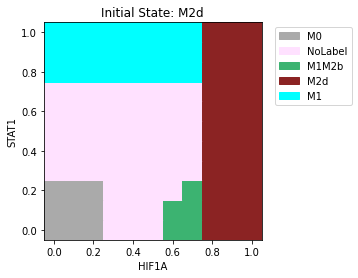

In [46]:
for file in [a]:

    data = pd.read_csv(path+"/csv-clean/" + file, index_col=0)
    
    file = file.replace(".csv","")
    ## folder to save figures
    if not os.path.exists(path+"/svg-color/"+file):
        os.mkdir(path+"/svg-color/"+file)
    
    Ini_Sta = file.split("_")[0]
    nodeA = file.split("_")[1]
    nodeB = file.split("_")[2]
    try: nodeC = file.split("_")[3]
    except: nodeC = "TCR"
    #Check if nodes in header exist in df
    print(Ini_Sta,nodeA, nodeB, nodeC)
    #missing = [n for n in [nodeA, nodeB, nodeC] if n not in data.columns]
    missing = [n for n in [nodeA, nodeB, nodeC] if n not in data.columns]
    if len(missing) > 0:
        data = add_missing_columns_linspace(data, missing)
    data = data.drop(["Sum","Label"], 1)
    data["Sum"] = data.sum(axis=1)
    data["Label"] = data.apply(labelState, axis=1)
    data["Color"] = data["Label"].map(colors)
    if nodeC == "TCR": #2D graph
        plot_points_2D(path, Ini_Sta, data, nodeA, nodeB, nodeC, filename=file)
        plot_mesh_2D(path, Ini_Sta, data, nodeA, nodeB, nodeC, filename=file)
    
    else: #3D graph or die
        plot_points_3D(path, Ini_Sta,data, nodeA, nodeB, nodeC, filename=file)
        plot_mesh_3D(path, Ini_Sta,data, nodeA, nodeB, nodeC, filename=file)